# **Tarefa: Clustering**

### Nesta tarefa, você deve carregar um dataset e agrupar os objetos utilizando algoritmos de pelo menos duas categorias diferentes (centroide, hierárquico, densidade)

**Dicas:**
- Explore diferentes parâmetros, como o número de clusters ou a distância usada, para observar como isso afeta os resultados.
- Analise os insights que surgem a partir das visualizações dos agrupamentos encontrados.

# **Sobre o Dataset**

Este dataset contém informações detalhadas sobre clientes, como dados demográficos, hábitos de compra e interações com campanhas de marketing. Ele permite identificar perfis de clientes e realizar segmentações com base em suas preferências e comportamentos de consumo.

**Features:**
- **Year_Birth:** Ano de nascimento do indivíduo.
- **Education:** Nível mais alto de educação alcançado.
- **Marital_Status:** Estado civil do indivíduo.
- **Income:** Renda anual do indivíduo.
- **Kidhome:** Número de crianças pequenas na casa.
- **Teenhome:** Número de adolescentes na casa.
- **Recency:** Dias desde a última compra ou interação.
- **MntWines:** Quantia gasta em vinhos.
- **MntFruits:** Quantia gasta em frutas.
- **MntMeatProducts:** Quantia gasta em produtos de carne.
- **MntFishProducts:** Quantia gasta em produtos de peixe.
- **MntSweetProducts:** Quantia gasta em doces.
- **NumStorePurchases:** Número de compras em lojas físicas.
- **NumWebVisitsMonth:** Número de visitas ao site da empresa em um mês.


# **Carregue as bibliotecas**

Dica: Para esta tarefa, além das bibliotecas `pandas` e `matplotlib`, explore funções das bibliotecas `sklearn` e `sklearn_extra`. Considere os seguintes pacotes:
- **cluster:** KMeans, KMedoids, AgglomerativeClustering, DBSCAN
- **preprocessing:** MinMaxScaler (normalização) e OneHotEncoder (binarização)
- **metrics:** silhouette_score

Sinta-se à vontade para adicionar outros pacotes que achar úteis.

```python
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

### **Carregue os Dados**

In [438]:
path = 'customer_segmentation-24-2.csv'
df = pd.read_csv(path)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumStorePurchases,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,4,7
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,2,5
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,10,4
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,4,6
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,6,5


In [439]:
print(df.Education.unique())
print(df.Marital_Status.unique())
print(df.isnull().sum())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow']
Year_Birth            0
Education             0
Marital_Status        0
Income               13
Kidhome               0
Teenhome              0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
NumStorePurchases     0
NumWebVisitsMonth     0
dtype: int64


## **Pré-Processamento dos Dados**

Aplique as técnicas de pré-processamento que vimos em aula no dataset fornecido.

### **Dicas:**
- **Converter dados categóricos para numéricos:** Use `LabelEncoder` ou `OneHotEncoder`.

- **Transformar os dados:** Experimente `MinMaxScaler` para ajustar a escala dos dados.

- **Remover outliers:** Verifique outliers com base no IQR e os elimine se necessário.

- **Tratar valores nulos:** Preencha com a média, moda, mediana ou remova as linhas, dependendo do impacto no dataset.


In [440]:
oe_education = OrdinalEncoder(categories=[['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']])
df['Education'] = oe_education.fit_transform(df[['Education']])

# TODO: analyze outliers and decide which ones to remove
for column in df.columns.drop(['Education', 'Marital_Status']):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] < (Q3 + 1.5 * IQR)) & (df[column] > (Q1 - 1.5 * IQR))]

ohe = OneHotEncoder(sparse_output=False)
marital_status = ohe.fit_transform(df[['Marital_Status']])
dfMarital_Status = pd.DataFrame(marital_status, columns=ohe.get_feature_names_out(['Marital_Status']))
df = pd.concat([df, dfMarital_Status], axis = 1)
df.drop(columns=['Marital_Status'], axis = 1, inplace = True)
df.reset_index(drop=True, inplace=True)

# TODO: should we input the mean in the null values?
df['Income'] = df['Income'].fillna(df['Income'].mean())

scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

df.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumStorePurchases,NumWebVisitsMonth,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.192308,0.25,0.469431,0.5,0.5,0.383838,0.009291,0.020833,0.014245,0.04,0.04,0.0,0.444444,0.0,0.0,0.0,1.0,0.0
1,0.769231,0.25,0.231380,0.5,0.0,0.262626,0.009291,0.083333,0.054131,0.20,0.12,0.4,0.555556,0.0,0.0,0.0,1.0,0.0
2,0.788462,1.00,0.313655,0.5,0.0,0.323232,0.064189,0.208333,0.156695,0.06,0.04,0.4,0.777778,0.0,1.0,0.0,0.0,0.0
3,0.576923,1.00,0.276155,0.5,0.0,0.191919,0.011824,0.000000,0.065527,0.06,0.12,0.0,0.888889,0.0,0.0,1.0,0.0,0.0
4,0.615385,0.00,0.000000,0.0,0.0,0.595960,0.005068,0.333333,0.028490,0.22,0.04,0.2,0.777778,0.0,1.0,0.0,0.0,0.0


In [441]:
df.count()

Year_Birth                 520
Education                  520
Income                     770
Kidhome                    520
Teenhome                   520
Recency                    520
MntWines                   520
MntFruits                  520
MntMeatProducts            520
MntFishProducts            520
MntSweetProducts           520
NumStorePurchases          520
NumWebVisitsMonth          520
Marital_Status_Divorced    520
Marital_Status_Married     520
Marital_Status_Single      520
Marital_Status_Together    520
Marital_Status_Widow       520
dtype: int64

# **Clustering**

**Escolha ao menos 2 algoritmos de clustering que pertençam a métodos diferentes (centróides, densidade ou hierárquico).**

### **Passos:**

1. Para cada algoritmo, execute-o em 6 diferentes cenários, variando os parâmetros.

2. Calcule o índice de silhueta `silhouette_score` para cada cenários e compare os resultados.

In [442]:
# DBSCAN

dbscan_params = [
    {'eps': 0.7, 'min_samples': 3},
    {'eps': 0.7, 'min_samples': 5},
    {'eps': 1, 'min_samples': 3},
    {'eps': 1, 'min_samples': 5},
    {'eps': 1.3, 'min_samples': 3},
    {'eps': 1.3, 'min_samples': 5},
]

dbscan_scores = []
for param in dbscan_params:
    eps, min_samples = param['eps'], param['min_samples']
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(df)
    if len(set(dbscan_labels)) > 1:
        dbscan_score = {'eps': eps, 'min_samples': min_samples, 'score': silhouette_score(df, dbscan_labels)}
        dbscan_scores.append(dbscan_score)
    else:
        print(f'The DBSCAN with eps={eps} and min_samples={min_samples} did not generate enough clusters')



# Agglomerative Clustering

agg_params = [
    {'n_clusters': 2, 'linkage': 'ward'},
    {'n_clusters': 3, 'linkage': 'ward'},
    {'n_clusters': 4, 'linkage': 'ward'},
    {'n_clusters': 2, 'linkage': 'complete'},
    {'n_clusters': 3, 'linkage': 'complete'},
    {'n_clusters': 4, 'linkage': 'complete'},
]

agg_scores = []
for param in agg_params:
    n_clusters, linkage = param['n_clusters'], param['linkage']
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    agg_labels = agg_cluster.fit_predict(df)
    if len(set(agg_labels)) > 1:
        agg_score = {'n_clusters': n_clusters, 'linkage': linkage, 'score': silhouette_score(df, agg_labels)}
        agg_scores.append(agg_score)
    else:
        print(f'The Agglomerative clustering with n_clusters={n_clusters} and linkage={linkage} did not generate enough clusters')


ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### **Resultados**

1. **Resumo dos Resultados:**
   - Para cada algoritmo utilizado, apresente os resultados dos 6 cenários testados e compare as métricas calculadas.

2. **Visualização Gráfica:**
   - Plote um gráfico comparando o índice de silhueta entre os cenários.





DBSCAN(eps=0.7, min_samples=3): 0.3680948549329352
DBSCAN(eps=0.7, min_samples=5): 0.36309471331241455
DBSCAN(eps=1, min_samples=3): 0.37818970374552574
DBSCAN(eps=1, min_samples=5): 0.37818970374552574
DBSCAN(eps=1.3, min_samples=3): 0.39512147322190155
DBSCAN(eps=1.3, min_samples=5): 0.39512147322190155


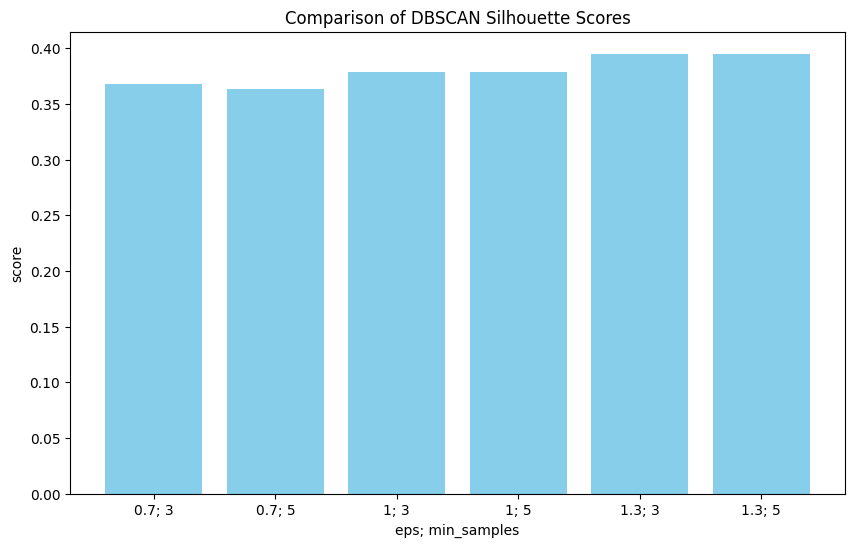

AggglomerativeClustering(nclusters=2, linkage=ward): 0.23230537683982674
AggglomerativeClustering(nclusters=3, linkage=ward): 0.31837219697996727
AggglomerativeClustering(nclusters=4, linkage=ward): 0.37519245226939407
AggglomerativeClustering(nclusters=2, linkage=complete): 0.21368991228507947
AggglomerativeClustering(nclusters=3, linkage=complete): 0.30711292185736055
AggglomerativeClustering(nclusters=4, linkage=complete): 0.37519245226939407


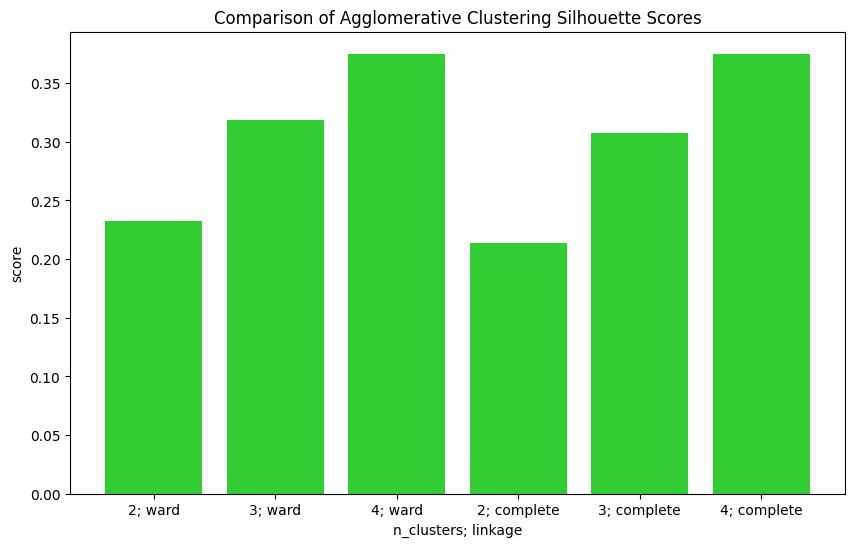

In [385]:
# DBSCAN

dbscan_silhouette_scores = []
dbscan_param_descriptions = []

for score in dbscan_scores:
    eps, min_samples, silhouette_score = score['eps'], score['min_samples'], score['score']
    dbscan_silhouette_scores.append(silhouette_score)
    dbscan_param_descriptions.append(f'{eps}; {min_samples}')
    print(f'DBSCAN(eps={eps}, min_samples={min_samples}): {silhouette_score}')

plt.figure(figsize=(10, 6))
plt.bar(dbscan_param_descriptions, dbscan_silhouette_scores, color='skyblue')
plt.xlabel('eps; min_samples')
plt.ylabel('score')
plt.title('Comparison of DBSCAN Silhouette Scores')
plt.show()

# Agglomerative Clustering

agg_silhouette_scores = []
agg_param_descriptions = []

for score in agg_scores:
    n_clusters, linkage, silhouette_score = score['n_clusters'], score['linkage'], score['score']
    agg_silhouette_scores.append(silhouette_score)
    agg_param_descriptions.append(f'{n_clusters}; {linkage}')
    print(f"AggglomerativeClustering(nclusters={n_clusters}, linkage={linkage}): {silhouette_score}")

plt.figure(figsize=(10, 6))
plt.bar(agg_param_descriptions, agg_silhouette_scores, color='limegreen')
plt.xlabel('n_clusters; linkage')
plt.ylabel('score')
plt.title('Comparison of Agglomerative Clustering Silhouette Scores')
plt.show()



## **Encontre o melhor clustering para cada um dos algoritmos selecionados**

Depois de executar os algoritmos com diferentes combinações de parâmetros, identifique quais obtiveram os melhores resultados de acordo com índice de silhueta para cada um dos 2 (ou mais) algoritmos selecionados.


In [436]:
best_dbscan = DBSCAN(eps=1.3, min_samples=2)
dbscan_labels = best_dbscan.fit_predict(df)

best_agg = AgglomerativeClustering(n_clusters=2, linkage='complete')
agg_labels = best_agg.fit_predict(df)

ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## **Para cada algoritmo, visualize graficamente o modelo que teve o melhor desempenho**

Com base nos modelos de melhor desempenho, escolha variáveis e crie gráficos de dispersão que permitam visualizar os clusters gerados.

**Dica:**

Ao criar scatter plots, teste combinações de 2 variáveis do dataset para facilitar a visualização dos clusters. Para o clustering hierárquico, experimente também plotar um dendrograma.

### **Dendrograma:**
Use o código abaixo para o dendrograma:
```python
import scipy.cluster.hierarchy as sch

Z = sch.linkage(df[[variavel_1, variavel_2]], method='centroid')

# p = altura máxima que será exibida
sch.dendrogram(Z, p = ?, truncate_mode = "level") # Mude o valor de p para melhorar a vizualização do seu dendrograma

```



[
Documentação Dendrograma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram)

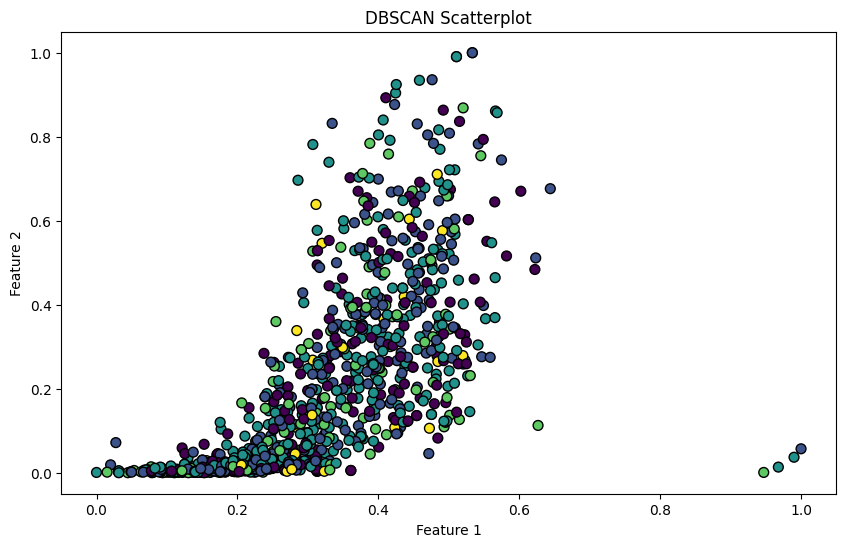

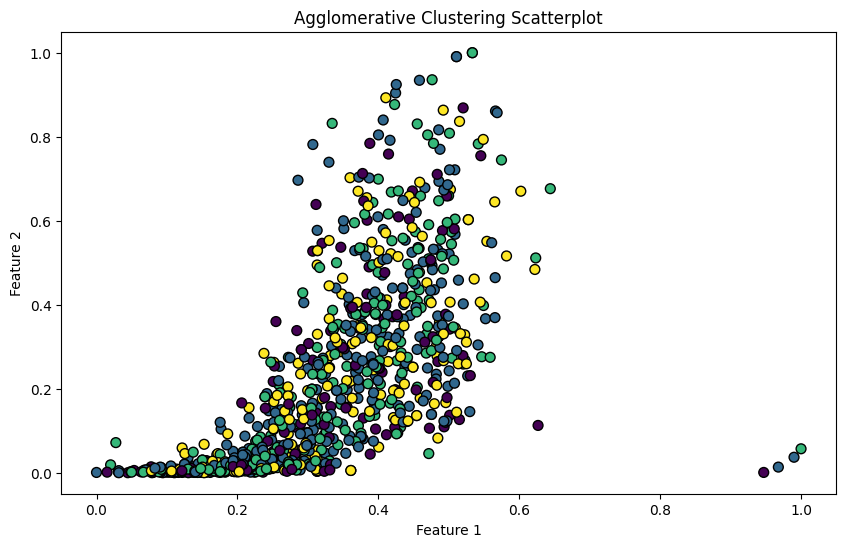

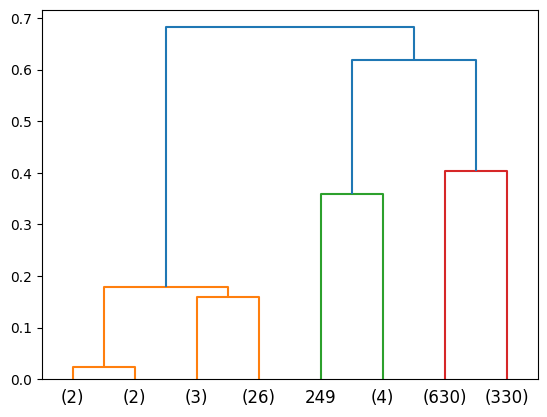

In [387]:
# DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(df[['Income']], df[['MntWines']], c=dbscan_labels, cmap='viridis', s=50, edgecolor='k')
plt.title('DBSCAN Scatterplot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df[['Income']], df[['MntWines']], c=agg_labels, cmap='viridis', s=50, edgecolor='k')
plt.title('Agglomerative Clustering Scatterplot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

import scipy.cluster.hierarchy as sch
Z = sch.linkage(df[['Income', 'MntWines']], method='centroid')
p = 2
sch.dendrogram(Z, p, truncate_mode='level')
print('')

### **Análise dos Clusters**

Após identificar o melhor modelo, selecione **3 itens de cada cluster** e explique o que cada agrupamento parece representar com base nas características dos itens.

1. **Análise dos Itens:**
   - Analise as características principais desses itens (ex.: renda, número de compras, produtos comprados).
   - Identifique padrões ou características que diferenciam cada cluster.

2. **Interpretação dos Agrupamentos:**
   - Explique o que cada cluster parece estar representando.
   - Relacione as características predominantes de cada cluster a possíveis perfis de clientes (ex.: clientes com alta renda e foco em produtos premium, ou clientes com baixa frequência de compras).


Responda aqui....